Подключаю библиотеки для начального анализа данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#! pip uninstall scikit-learn

Загружаю датасет и проверяю на наличие пропусков и дубликатов и при наличии удаляю их



In [3]:
df=pd.read_csv('creditcard.csv')
print('Было удалено', df.duplicated().sum()-1, 'повторяющихся значений')
df=df.drop_duplicates(keep='first')
print('В датафрейме',df.isna().sum().sum(),'пустых значений')

Было удалено 1080 повторяющихся значений
В датафрейме 0 пустых значений


Посмотрим на имеющиеся данные. Основные параметры операции - время платежа(Time), отсчитывается с совершения первой операции, сумма платежа (Amount), набор некоторых параметров V1-V28, а также параметр Class, который принимает значение 1, если операция мошенническая и 0, если честная. Параметр Class выступает в роли target переменной

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Посмотрим соотношение мошеннических и честных операций

In [5]:
C1=df[df['Class']==1]
C2=df[df['Class']==0]
print(len(C1),'мошеннических операций и',len(C2),'честных операций')

473 мошеннических операций и 283253 честных операций


Очевидно, данные несбалансированны, поскольку количество мошеннических операций минимально по отношению к честным. Перебалансируем данные методом NearMiss-1

Построим карту распределения кореляций для сбалансированной выборки

<Axes: >

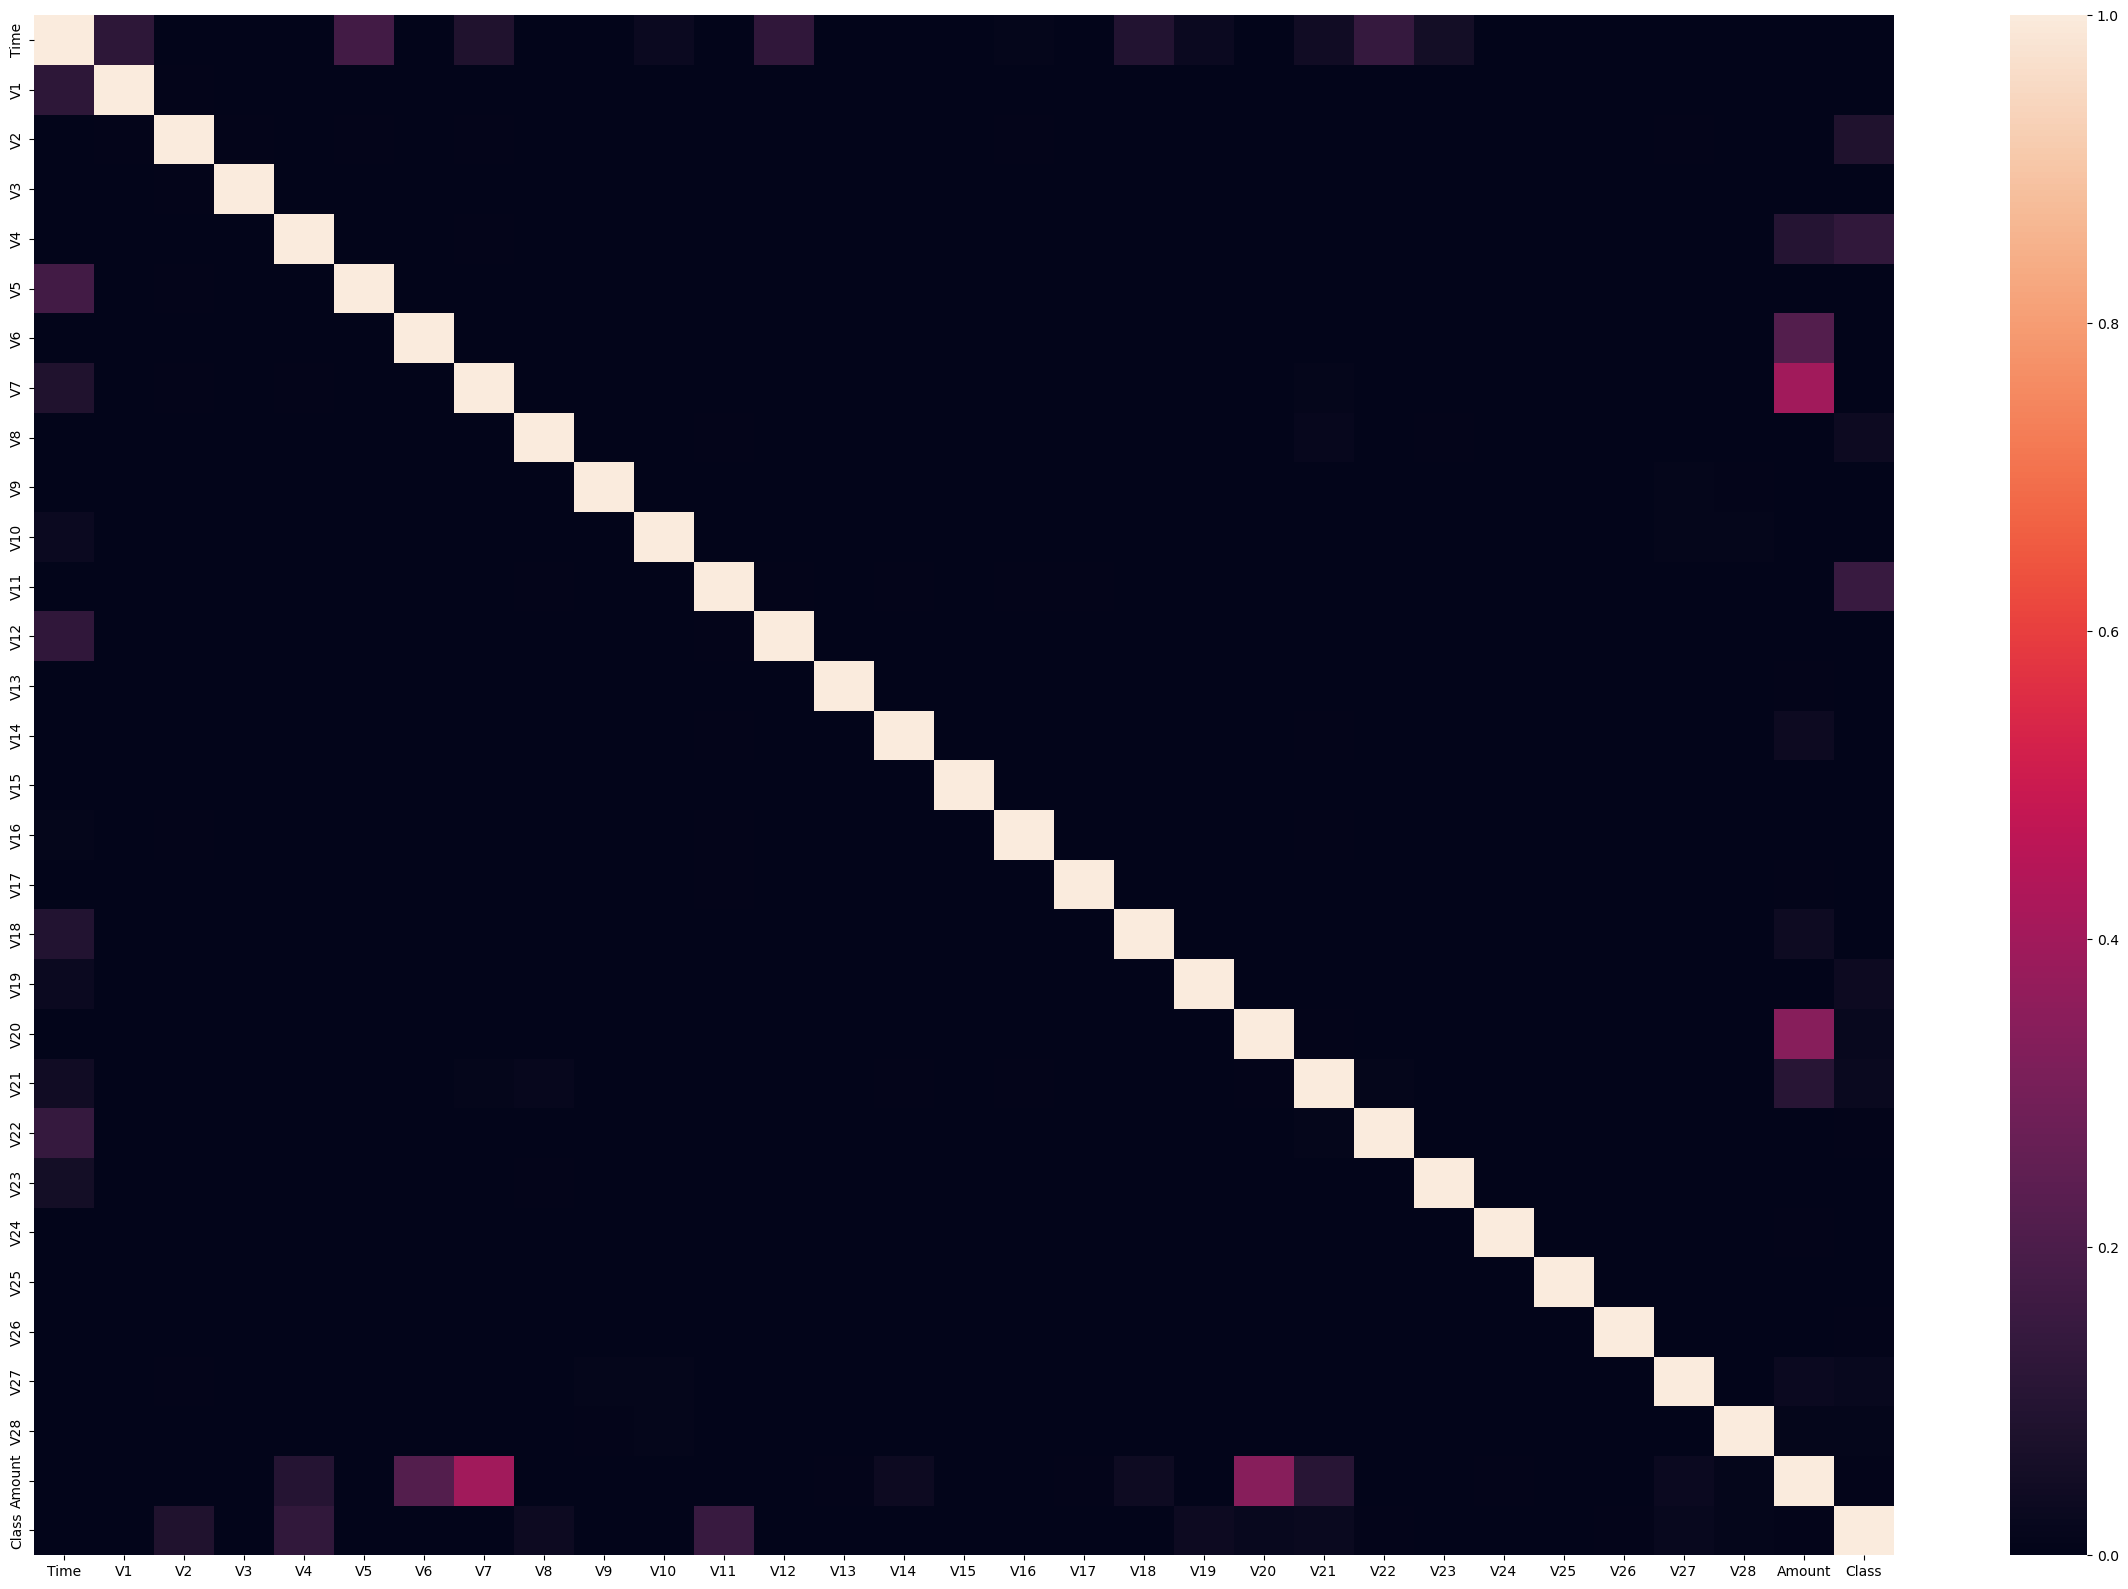

In [6]:

plt.figure(figsize=(30,20))

sns.heatmap(df.corr(), vmin=0,
    vmax=1)

Отметим, что данные между собой не кореллируют. Разделим выборку на две подвыборки train и test, сохраняяя пропорции фичи Class

In [7]:
x=df.drop('Class',axis=1)
y=df['Class']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=0,
    test_size=0.2,
    stratify=y
)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_ss = pd.DataFrame(data=ss.transform(x_train), columns=ss.get_feature_names_out())
x_test_ss = pd.DataFrame(data=ss.transform(x_test), columns=ss.get_feature_names_out())

Сделаем андерсэмпл обучающей выборки

In [8]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1)
x,y=nm.fit_resample(x_train_ss, y_train)
print('Вхождение данных разных классов в сбалансированную выборку')
print( y.value_counts())

Вхождение данных разных классов в сбалансированную выборку
Class
0    378
1    378
Name: count, dtype: int64


Сравним статистики  генеральной, обучающей и тестовой выборки

In [9]:
print('Статистики генеральной выборки')
df.describe()

Статистики генеральной выборки


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
print('Статистики обучающей выборки')
x_train.describe()

Статистики обучающей выборки


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,94750.938893,0.008213,-0.002460,0.004716,-0.005842,0.000594,0.000797,0.000748,0.000634,-0.002683,...,0.000770,-0.000581,-0.000782,0.000539,0.000555,-0.000164,0.000955,0.001095,0.001012,88.309019
std,47497.059848,1.931856,1.624886,1.504713,1.411102,1.375101,1.330744,1.225550,1.175332,1.096290,...,0.759984,0.721341,0.723254,0.617268,0.605368,0.520326,0.482441,0.396013,0.329968,247.249302
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54182.000000,-0.915360,-0.601523,-0.884900,-0.851025,-0.691071,-0.767801,-0.552163,-0.207933,-0.646252,...,-0.211298,-0.228489,-0.542763,-0.161583,-0.354321,-0.317078,-0.327043,-0.070694,-0.052765,5.600000
50%,84613.000000,0.019737,0.063571,0.181686,-0.026530,-0.054172,-0.274268,0.038603,0.022248,-0.052752,...,-0.062505,-0.029779,0.005401,-0.011192,0.041024,0.016502,-0.051615,0.001350,0.011330,22.000000
75%,139313.250000,1.315404,0.799557,1.027616,0.736409,0.611283,0.397151,0.568575,0.327032,0.595806,...,0.133256,0.185869,0.526807,0.147415,0.439679,0.349942,0.240468,0.091065,0.078465,77.520000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,38.117209,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [11]:
y_train.describe()

count    226980.000000
mean          0.001665
std           0.040775
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [12]:
print('Статистики тестовой выборки')
x_test.describe()

Статистики тестовой выборки


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,95051.628185,-0.003265,-0.010832,-0.010799,0.008535,0.006762,-0.008885,0.006010,-0.006810,0.002753,...,-0.002142,0.000471,0.003053,-0.001164,-0.001150,-0.000507,-0.003074,0.004434,-0.001311,89.127349
std,47416.602486,2.011396,1.731221,1.524403,1.426398,1.384612,1.336651,1.236086,1.193821,1.092295,...,0.808750,0.734098,0.729712,0.648807,0.606664,0.524787,0.480489,0.394660,0.320140,262.623422
min,2.000000,-41.928738,-63.344698,-33.680984,-5.251492,-40.427726,-21.929312,-28.215112,-50.420090,-9.481456,...,-21.964898,-22.889347,-10.933144,-32.828995,-2.822684,-8.696627,-2.534330,-8.839766,-8.424041,0.000000
25%,54297.750000,-0.918296,-0.596403,-0.908194,-0.846339,-0.685710,-0.773295,-0.554272,-0.211774,-0.636702,...,-0.211940,-0.227482,-0.542402,-0.162104,-0.354820,-0.319319,-0.325689,-0.070364,-0.053049,5.680000
50%,85143.000000,0.022765,0.065587,0.172127,-0.005545,-0.050920,-0.278802,0.050034,0.020523,-0.049744,...,-0.061769,-0.028452,0.011392,-0.010995,0.040977,0.015217,-0.054529,0.002024,0.011135,22.070000
75%,139236.250000,1.319969,0.802650,1.025090,0.752185,0.615703,0.395077,0.577300,0.321264,0.596490,...,0.133044,0.187653,0.534133,0.148866,0.440057,0.353753,0.238865,0.091862,0.077458,77.500000
max,172785.000000,2.446505,18.902453,4.101716,16.715537,32.911462,23.917837,44.054461,19.168327,9.112555,...,39.420904,22.588989,7.248763,20.803344,3.998294,5.826159,3.463246,10.507884,15.632689,19656.530000


In [13]:
y_test.describe()

count    56746.000000
mean         0.001674
std          0.040882
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

Проведем обучение моделей catboost, knn и decision tree на сбалансированной выборке, в качестве метрик точности будем использовать precision,recall и f1 меру

In [14]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(verbose=False)
cb.fit(x, y)
y_pred = cb.predict(x_test_ss)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test,y_pred)

(0.0017662917170214744, 1.0, 0.0035263548626577575)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x, y);
knn_y_pred = knn_model.predict(x_test_ss)
precision_score(y_test, knn_y_pred), recall_score(y_test, knn_y_pred), f1_score(y_test,knn_y_pred)

(0.008616516603737051, 0.9368421052631579, 0.017075978511128166)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)
tree_y_pred = model.predict(x_test_ss)
precision_score(y_test, tree_y_pred), recall_score(y_test, tree_y_pred), f1_score(y_test,tree_y_pred)

(0.0018552875695732839, 0.9578947368421052, 0.0037034022464593848)

Видим, что все методы справились с задачей ужасно, так я узнал, что недосэмплирование - штука не из лучших. Попробуем сделать оверсэмплинг методом SMOTE(Synthetic Minority Over-sampling Technique)

In [17]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=42)


x,y = sm.fit_resample(x_train_ss, y_train)
print('Вхождение данных разных классов в сбалансированную выборку')
print( y.value_counts())

Вхождение данных разных классов в сбалансированную выборку
Class
0    226602
1    226602
Name: count, dtype: int64


In [18]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(verbose=False)
cb.fit(x, y)
y_pred = cb.predict(x_test_ss)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test,y_pred)

(0.515527950310559, 0.8736842105263158, 0.6484375)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x, y);
knn_y_pred = knn_model.predict(x_test_ss)
precision_score(y_test, knn_y_pred), recall_score(y_test, knn_y_pred), f1_score(y_test,knn_y_pred)

(0.46511627906976744, 0.8421052631578947, 0.599250936329588)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x, y)
tree_y_pred = model.predict(x_test_ss)
precision_score(y_test, tree_y_pred), recall_score(y_test, tree_y_pred), f1_score(y_test,tree_y_pred)

(0.01816283924843424, 0.9157894736842105, 0.035619242579324466)

При оверсэмплинге результаты куда лучше, наилучший результат показала модель кэтбуст, однако результаты нельзя назвать удовлетворительными, очевидно, в данной задаче сэмплирование было применять нерационально